# Modelling Oscillations

### Delay differential equation: 
 $\tau \frac{dr(t)}{dt} = -r(t) + [\omega r (t-d) +r_{ext}]_+$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [3]:
def rt(rs, dt, w, tau, index_d, r_ext):
    rectified = max(w * rs[-index_d] + r_ext, 0.0)
    rs = np.append(rs, rs[-1] + (-rs[-1] + rectified) * dt / tau)
    return rs


def evolve(T, dt, r_0=2.0, w=-5.0, tau=1.0, d=0.5, r_ext=10.0):
    index_d = int(d / dt) + 1
    rs = np.ones(index_d) * r_0
    ts = np.arange(0, T + dt, dt)
    for t in ts[1:]:
        rs = rt(rs, dt, w, tau, index_d, r_ext)
    return rs[index_d - 1:], ts




In [4]:
dt = 0.01
T = 10

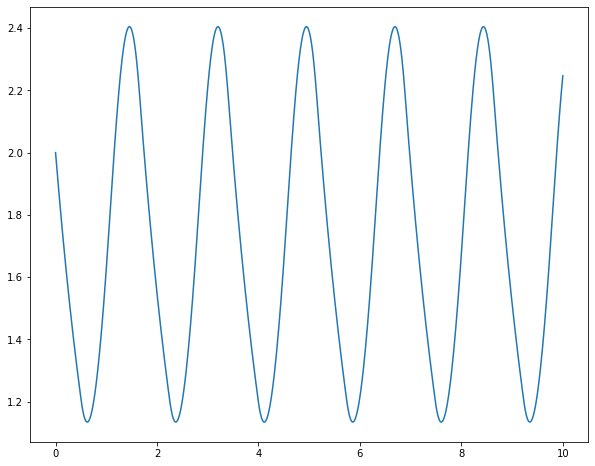

In [6]:
r, t = evolve(T, dt, w=-5, d=0.5)
plt.figure(figsize=(10,8))
plt.plot(t, r)
plt.xlabel=("$t$")
plt.ylabel=("$r$")
plt.show()

In [ ]:
def estimate_frequency(r, dt): 
    sp = rfft(r - np.mean(r))  
    freq = rfftfreq(r.shape[-1], dt)
    return freq[np.argmax(np.abs(sp))]

In [7]:
ws = np.arange(-10., -1.4, 0.1)
ds = np.arange(0.0, 2.05, 0.05)
frequencies = np.zeros((len(ws), len(ds)))

for i, w in enumerate(ws):
    for j, d in enumerate(ds):
        r, t = evolve(100, dt, w=w, d=d)

        if np.max(np.abs(r[-100:-2] - r[-1])) > 10**-3:
            frequencies[i, j] = estimate_frequency(r, dt)

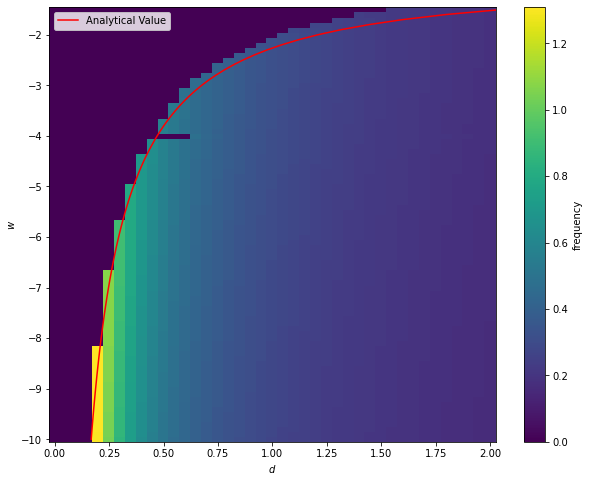

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
im = ax.pcolor(ds, ws, frequencies, shading="nearest")
ax.set(xlabel=r"$d$", ylabel=r"$w$")
fig.colorbar(im, label="frequency")
ax.plot(np.arccos(1 / ws) / np.sqrt(ws**2 - 1), ws, c="red", label="Analytical Value")
ax.set(xlim=(ds[0] - 0.5 * ds[1], ds[-1] + 0.5 * ds[1]))
ax.legend()

plt.show()